**Importing all required libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout,Flatten, Lambda
from keras.layers import Conv2D, Activation,AveragePooling2D,MaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/94_character_TMNIST.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/94_character_TMNIST.csv')

**Abstract**

The objective of this notebook is to construct a Convolutional Neural Network (CNN) using a basic TMINST dataset consisting of 94 characters. Upon completion, the CNN model has achieved a accuracy of 95.08%.

 **Understanding the dataset**

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Get basic statistical details
print(df.describe())


                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB
None
names

**Data Exploration**

In [ ]:
#retrieving all the unique values from the labels column
all = list(df['labels'].unique())
df['labels'].unique()

#Defining the regular expressions to match the character types
capital_letters_regex = re.compile(r"[A-Z]") #Matches Uppercase Letters
small_letters_regex = re.compile(r"[a-z]")   #Matches Lowercase Letters
numbers_regex = re.compile(r"[0-9]")         #Matches numbers (0-9)
special_characters_regex = re.compile(r"[\W]|[\_\,]") #Matches the special Characters

#Finding Matching Characters
capital_letters = capital_letters_regex.findall(str(all))  #List of Uppercase Letters
small_letters = small_letters_regex.findall(str(all))      #List of Lowercase Letters
numbers = numbers_regex.findall(str(all))                  #List of Numbers
special_characters = special_characters_regex.findall(str(all)) #List of Special Characters
# Removing the empty space character
special_characters.pop(27)

"'"

Let us start with Character Type Analysis and Visualization of the data to understand the dataset better.

I've created a bar chart to better examine the dataset's composition, detailing the distribution across various categories such as capital letters, lowercase letters, numbers, and special characters.

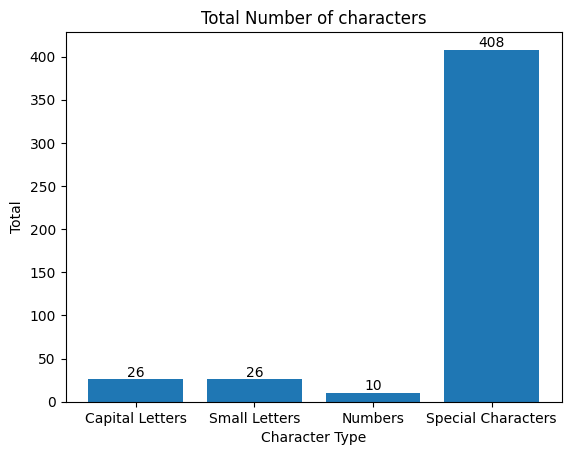

In [ ]:
fig, ax = plt.subplots()

characters = ["Capital Letters", "Small Letters", "Numbers", "Special Characters"]

counts = [len(capital_letters), len(small_letters), len(numbers), len(special_characters)]

bar = ax.bar(characters, counts)

ax.bar_label(bar)


ax.set_ylabel('Total')
ax.set_xlabel('Character Type')
ax.set_title('Total Number of characters')

plt.show()

Given the context that each character is represented exactly once, this plot confirms that the dataset includes an equal representation of both upper and lower case letters and numbers, with a large set of unique special characters.

Splitting the data into test and training sets

In [ ]:
#Feature and Label seperation
y=df['labels']
X=df.drop(['names','labels'],axis=1)
# Splitting the test and train data
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In this process, I am conducting a visualization of character images to visually assess the characters within the training set, ensuring the data's consistency and its diverse range of characters.

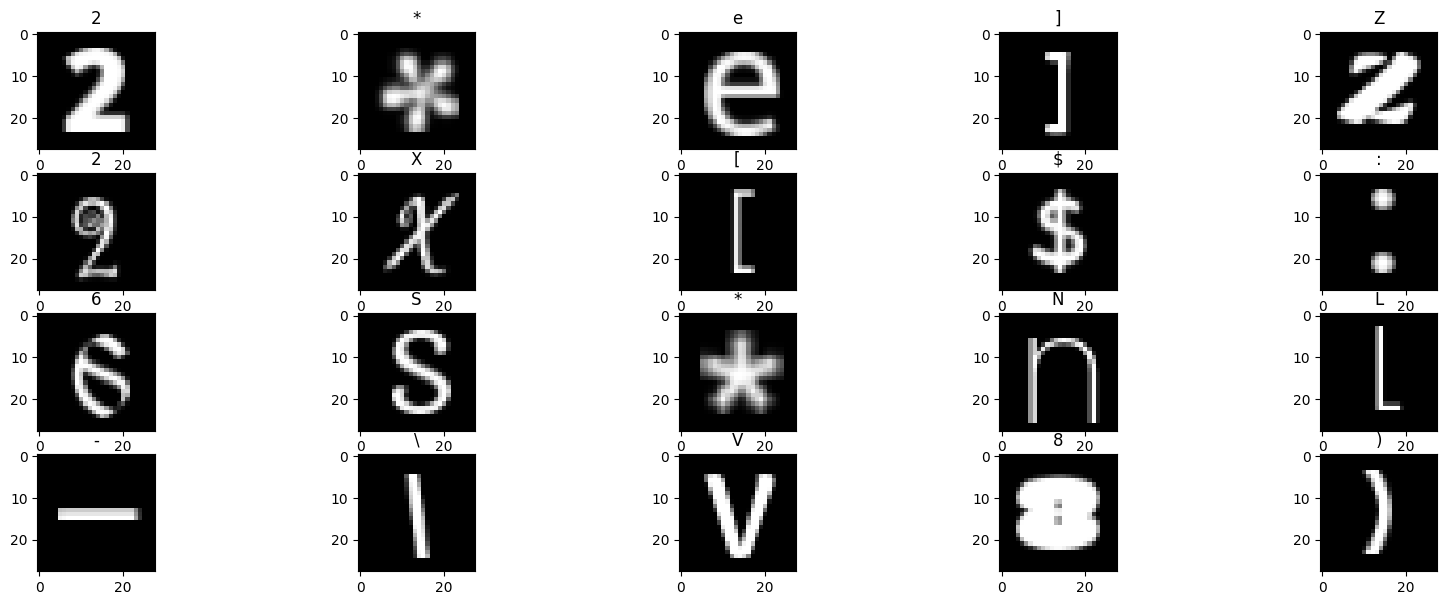

In [ ]:
plt.figure(figsize=(20, 7))
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.title(Y_train.iloc[i])
  # Converting 1d to 2d array using reshape
  plt.imshow(X_train.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))

plt.show()

The characters are presented in a grid format, making it easier to manually inspect and verify the dataset's composition and also the variability of each character image.

**Class Distribution in Training and Testing Sets**

Below I have plotted bar charts that represent the class distribution within the training and testing datasets. The uniform height of each bar suggests that every class (which, in this case, is a unique character) is represented equally across the datasets. This equal representation indicates a balanced dataset, which is essential for training a machine learning model, particularly a convolutional neural network (CNN), to ensure that the model does not develop a bias toward more frequently represented classes.

Text(0, 0.5, 'Count')

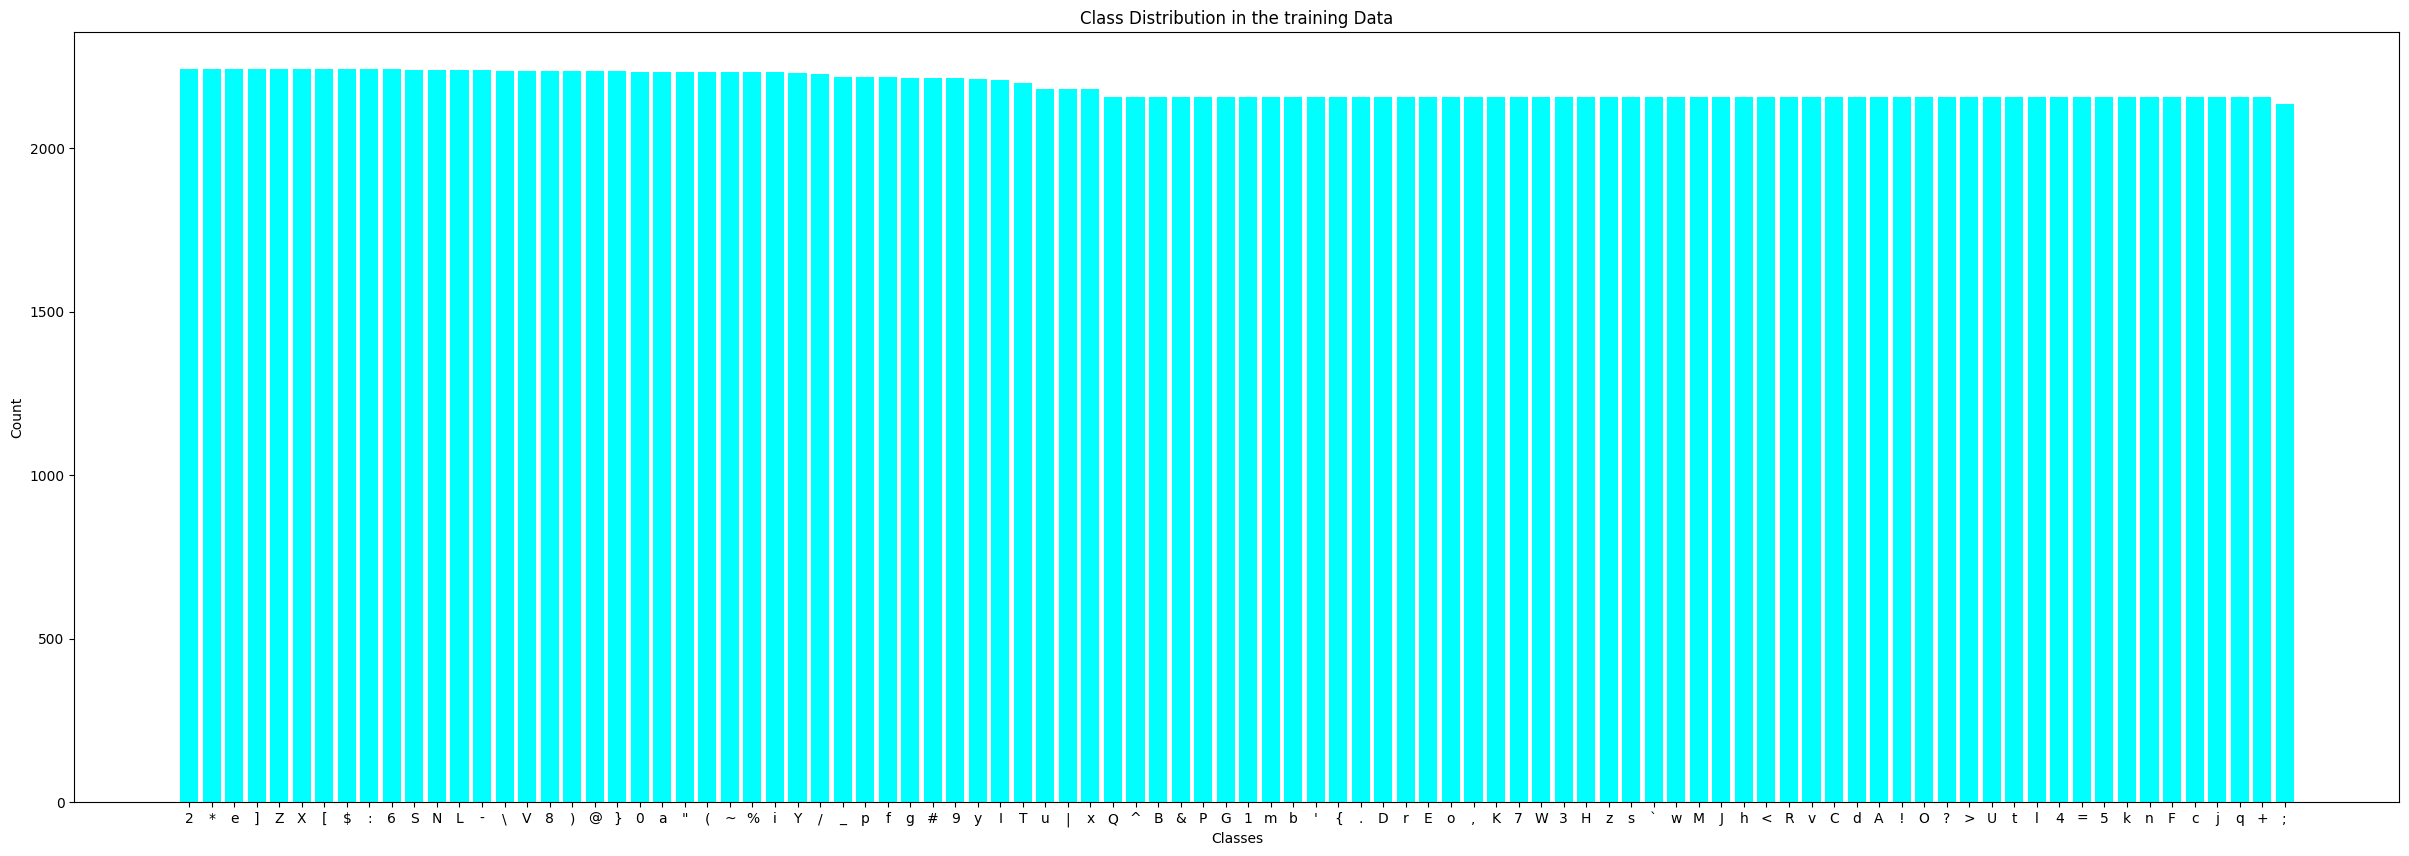

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(Y_train.unique(),Y_train.value_counts(),color='#00FFFF')
plt.title('Class Distribution in the training Data')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

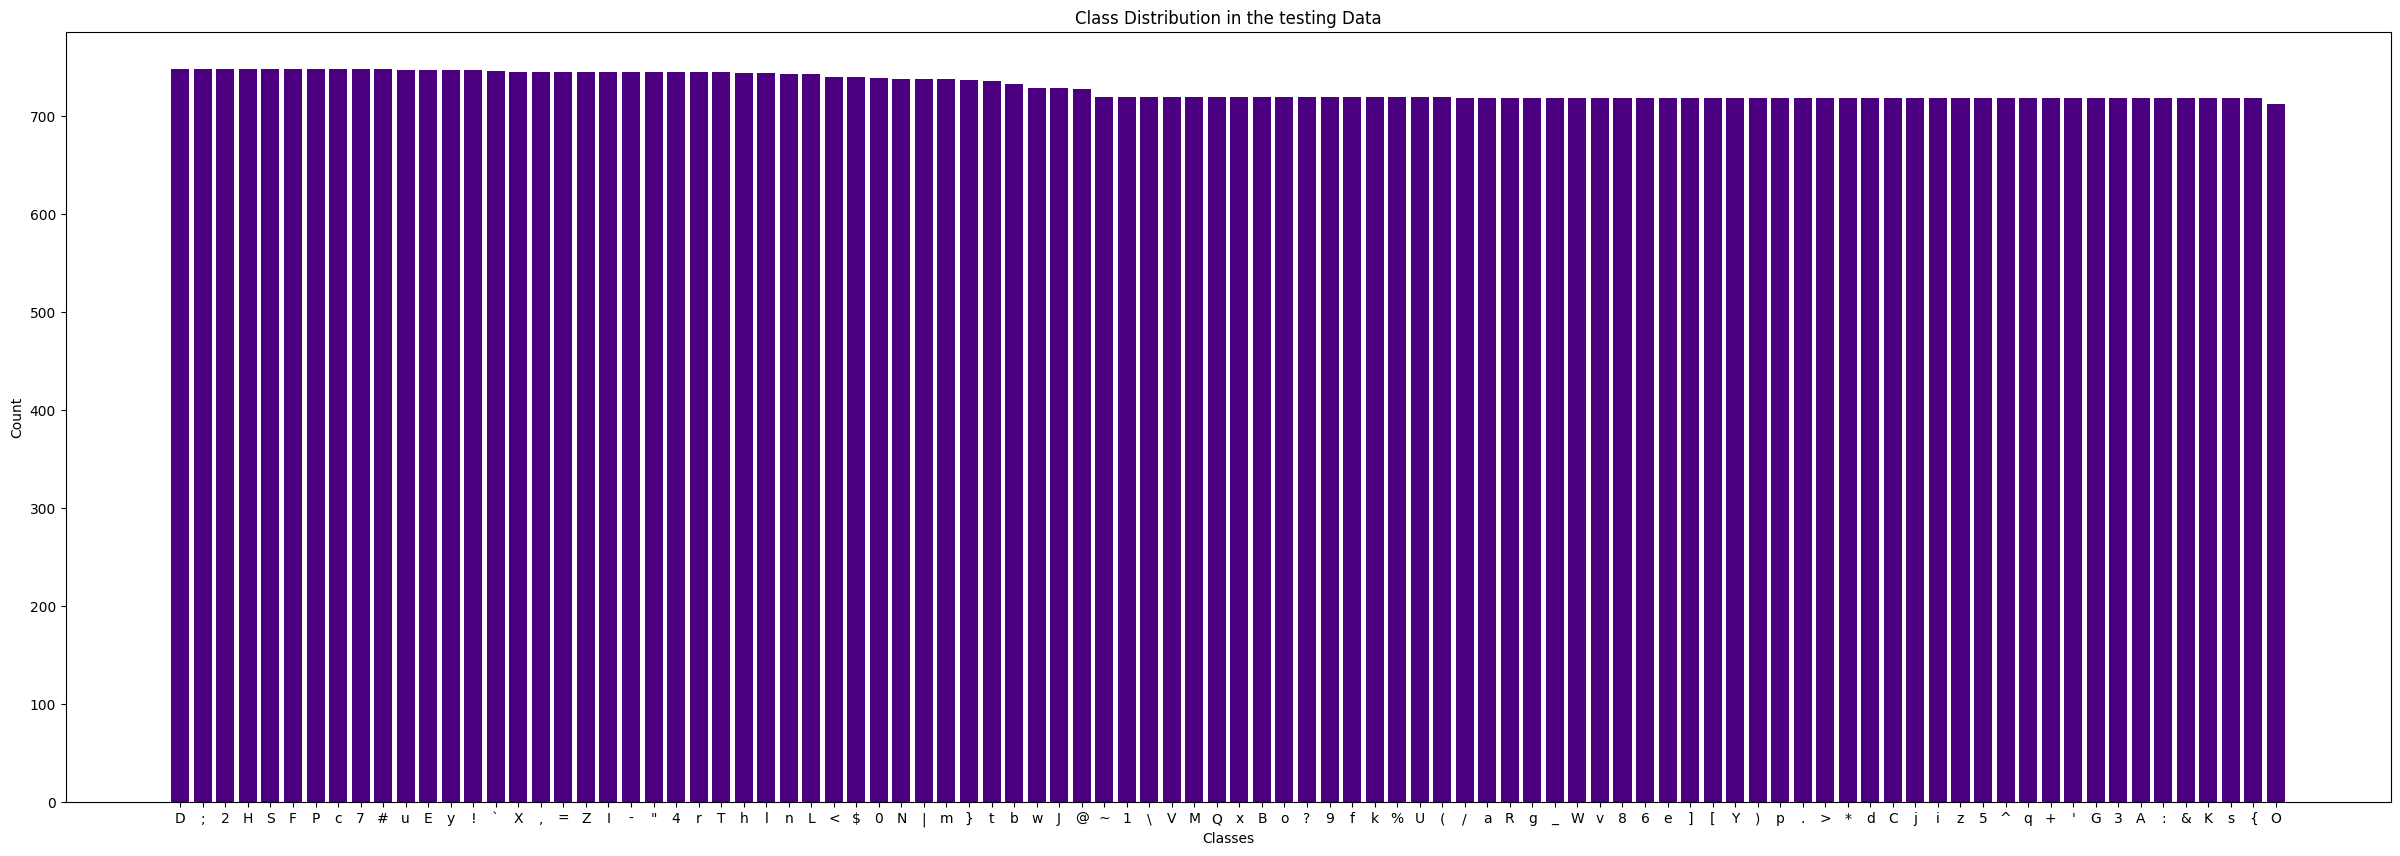

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(Y_test.unique(),Y_test.value_counts(),color='#4B0082')
plt.title('Class Distribution in the testing Data')
plt.xlabel('Classes')
plt.ylabel('Count')

The balanced nature of the datasets is likely by design, to provide each character with the same significance during the training and testing phases. This will likely lead to a model that performs uniformly across all classes without favoring any particular character due to its frequency in the dataset.

**Deep Neural Network Architecture for Character Recognition**

This section involves preprocessing the data constructing a deep neural network model aimed at recognizing 94 distinct characters. Initially,I have nrmalized the image data, and then label data is encoded using a one-hot encoding scheme.

In [ ]:
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [ ]:
#encoding the y values using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(Y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(Y_test.values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

In [ ]:
output_layer = df['labels'].nunique()
model = tf.keras.models.Sequential()
# Input Layer
model.add(Flatten(input_shape=(28,28)))
# Adding 3 Hidden Layers with length 512, 128 and 32 respectively
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
# Output Layer. Since there are 94 characters
model.add(Dense(94, activation='softmax'))
# opt = Adam()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474814 (1.81 MB)
Trainable params: 474814 (1.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model comprises an input layer that flattens the 28x28 image data, followed by three hidden layers with 512, 128, and 32 neurons respectively, each employing ReLU activation functions. The output layer is designed with 94 neurons, one for each character class, using the softmax activation function to handle multi-class classification. The model is then compiled with the Adam optimizer, mean squared error (MSE) loss function that tracks accuracy and MSE as metrics during training.



The development of this deep neural network is a critical step towards the automated classification of characters. Given the balanced class distribution, the network is structured to equally learn to recognize each unique character, aiming for high accuracy. This architecture is expected to be robust due to the multiple layers, which should capture the complex features necessary for differentiating among the 94 character classes.

In [ ]:
#fitting the model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10
1607/1607 - 27s - loss: 0.0042 - accuracy: 0.6977 - mse: 0.0042 - val_loss: 0.0026 - val_accuracy: 0.8243 - val_mse: 0.0026 - 27s/epoch - 17ms/step
Epoch 2/10
1607/1607 - 24s - loss: 0.0023 - accuracy: 0.8475 - mse: 0.0023 - val_loss: 0.0023 - val_accuracy: 0.8476 - val_mse: 0.0023 - 24s/epoch - 15ms/step
Epoch 3/10
1607/1607 - 24s - loss: 0.0020 - accuracy: 0.8655 - mse: 0.0020 - val_loss: 0.0020 - val_accuracy: 0.8691 - val_mse: 0.0020 - 24s/epoch - 15ms/step
Epoch 4/10
1607/1607 - 24s - loss: 0.0018 - accuracy: 0.8846 - mse: 0.0018 - val_loss: 0.0019 - val_accuracy: 0.8787 - val_mse: 0.0019 - 24s/epoch - 15ms/step
Epoch 5/10
1607/1607 - 22s - loss: 0.0016 - accuracy: 0.8946 - mse: 0.0016 - val_loss: 0.0017 - val_accuracy: 0.8916 - val_mse: 0.0017 - 22s/epoch - 14ms/step
Epoch 6/10
1607/1607 - 24s - loss: 0.0015 - accuracy: 0.9011 - mse: 0.0015 - val_loss: 0.0017 - val_accuracy: 0.8918 - val_mse: 0.0017 - 24s/epoch - 15ms/step
Epoch 7/10
1607/1607 - 22s - loss: 0.0014 - ac

The best accuracy value from the model training output is from the final epoch, Epoch 10, with a training accuracy of 91.84% and a validation accuracy of 90.57%

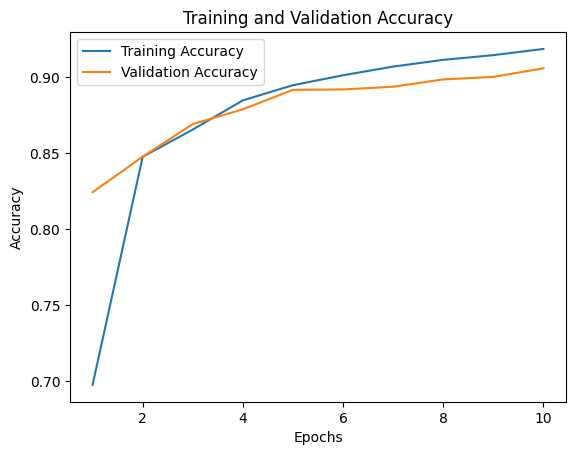

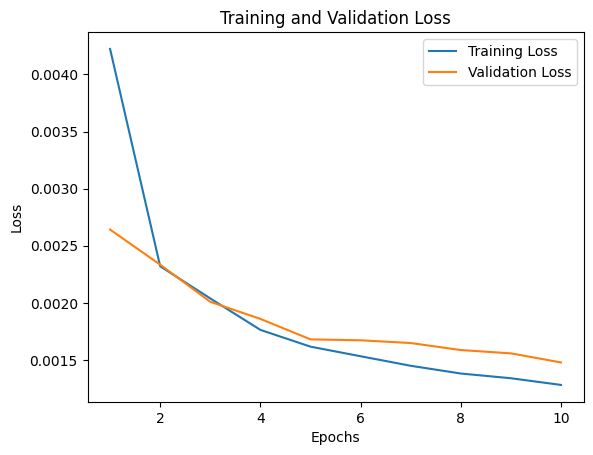

In [ ]:
import matplotlib.pyplot as plt

# Access data from training history
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Shifting focus towards enhancing the model's accuracy, I am now adopting a Convolutional Neural Network (CNN). Compared to the previously utilized fully-connected deep neural network, the CNN architecture will introduce two convolutional layers that specialize in extracting pivotal features from the images. This will be succeeded by a trio of dense layers that will handle the classification process.

The accuracy metric will continue to serve as our barometer for both training and evaluation phases, providing a direct comparison to gauge the enhancements from the prior deep neural network approach.

In [ ]:
conv_model = tf.keras.models.Sequential()

conv_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
conv_model.add(MaxPooling2D((2, 2)))

conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D((2, 2)))

conv_model.add(Flatten())


conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(32, activation='relu'))
conv_model.add(Dense(94, activation='softmax'))

# opt = Adam()
conv_model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
#fitting the model
conv_history=conv_model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10
1607/1607 - 532s - loss: 0.0012 - accuracy: 0.9257 - val_loss: 0.0013 - val_accuracy: 0.9197 - 532s/epoch - 331ms/step
Epoch 2/10
1607/1607 - 531s - loss: 0.0011 - accuracy: 0.9319 - val_loss: 0.0012 - val_accuracy: 0.9266 - 531s/epoch - 330ms/step
Epoch 3/10
1607/1607 - 536s - loss: 0.0010 - accuracy: 0.9358 - val_loss: 0.0011 - val_accuracy: 0.9290 - 536s/epoch - 334ms/step
Epoch 4/10
1607/1607 - 526s - loss: 9.8873e-04 - accuracy: 0.9386 - val_loss: 0.0013 - val_accuracy: 0.9187 - 526s/epoch - 327ms/step
Epoch 5/10
1607/1607 - 571s - loss: 0.0011 - accuracy: 0.9353 - val_loss: 0.0011 - val_accuracy: 0.9341 - 571s/epoch - 355ms/step
Epoch 6/10
1607/1607 - 527s - loss: 9.0823e-04 - accuracy: 0.9439 - val_loss: 0.0010 - val_accuracy: 0.9364 - 527s/epoch - 328ms/step
Epoch 7/10
1607/1607 - 525s - loss: 8.7989e-04 - accuracy: 0.9461 - val_loss: 0.0011 - val_accuracy: 0.9292 - 525s/epoch - 327ms/step
Epoch 8/10
1607/1607 - 529s - loss: 8.4563e-04 - accuracy: 0.9477 - val_loss: 

Switching to a Convolutional Neural Network (CNN) has improved the model's accuracy significantly. The highest validation accuracy achieved is around 95.08%, which is better than the previous deep neural network results. This shows that the CNN is more effective for image classification tasks in this dataset.

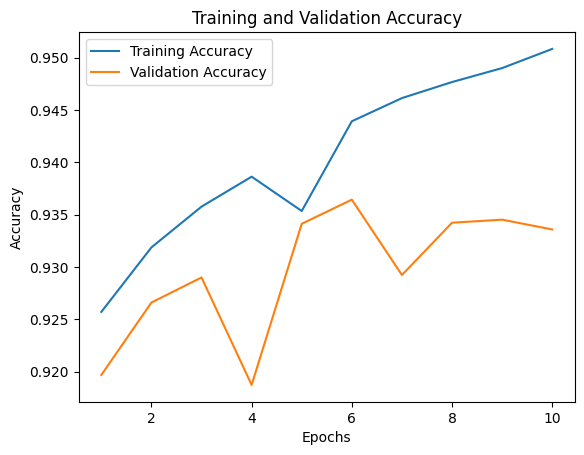

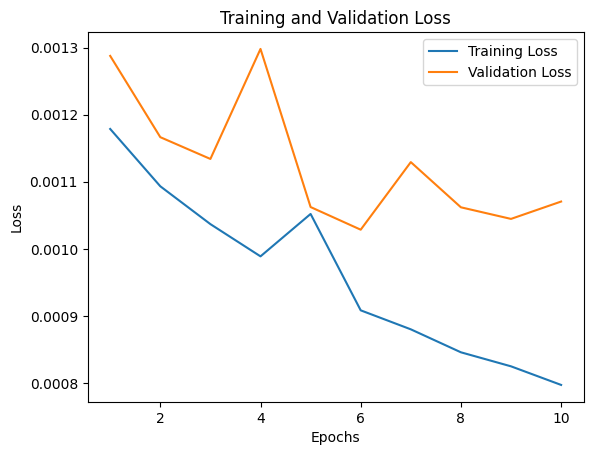

In [ ]:
import matplotlib.pyplot as plt

# Access data from training history
acc = conv_history.history['accuracy']
val_acc = conv_history.history['val_accuracy']
loss = conv_history.history['loss']
val_loss = conv_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Conclusion:

The deep neural network achieved a notable accuracy of 91.84% and a mean squared error (MSE) of 0.0013. On the other hand, the Convolutional Neural Network (CNN) model exhibited a superior performance, reaching an accuracy of 95.08% with a slightly lower MSE of 0.0011.

References:

1. Kaggle documentation
2. Developing a CNN for MNIST Handwritten Digit Classification (https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)

MIT License
Copyright (c) 2024 Vishruthtv30
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.